In [1]:
import numpy as np
import math
import sympy
import sympy as sp
from sympy import latex, Eq, IndexedBase, symbols, Idx, Indexed, Sum, S, diff
from sympy.functions.special.tensor_functions import KroneckerDelta
import matplotlib.pyplot as plt
from sympy.vector import Vector, CoordSys3D, AxisOrienter, BodyOrienter, Del, curl, divergence, gradient, is_conservative, is_solenoidal, scalar_potential, Point, scalar_potential_difference
from sympy.physics.vector import ReferenceFrame
from sympy.vector import express
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, display_latex

In [2]:
a, b, c, d, e, f, g, h, i, j, k, l, m, n, o, p, q, r, s, t, u, v, w, x, y, z = sympy.symbols('a:z')
alpha, beta, gamma, theta, phi, rho, omega = sympy.symbols('alpha beta gamma theta phi rho omega')
Alpha, Beta, Gamma, Theta, Phi, Rho, Omega = sympy.symbols('Alpha Beta Gamma Theta Phi Rho Omega')

## Setup

In [3]:
sympy.init_printing()
np.set_printoptions(precision=3)

### Symbols

Cross product: ^  
Dot product: &  
Outer product: |

In [14]:
a, b, c, d, e, f = symbols('a:f')
u1, u2, u3, v1, v2, v3 = symbols('u_1 u_2 u_3 v_1 v_2 v_3')
E = ReferenceFrame('E')
u = u1 * E.x + u2 * E.y + u3 * E.z
v = v1 * E.x + v2 * E.y + v3 * E.z
u

#### Dot Product

In [4]:
u & v

#### Cross Product

In [5]:
u ^ v

In [23]:
N = CoordSys3D('N')

In [25]:
v = 2 * N.i + N.j
v

In [27]:
Vector.zero

In [28]:
N.origin

In [40]:
P = N.origin.locate_new('P', a*N.i + b*N.j + c*N.k)
Q = P.locate_new('Q', -b*N.j)
P

In [41]:
P.position_wrt(Q)

In [45]:
Q.express_coordinates(N)

#### Dyadics

In [46]:
dyad = N.i.outer(N.k)
dyad

In [60]:
A = CoordSys3D('A')
B = A.orient_new_axis('B', theta, A.k)
B

B

In [70]:
axis_orienter = AxisOrienter(theta, A.k)
B = A.orient_new('B', axis_orienter)
B

B

#### Chain Rotations

In [105]:
A = CoordSys3D('A')
body_orienter = BodyOrienter(a, b, c, 'XYZ')
B = A.orient_new('B', (axis_orienter, body_orienter)).subs(theta, 0)
B

B

#### Use Multiple Orienters

In [84]:
C = A.orient_new('C', (axis_orienter, body_orienter))
C

C

#### Get Rotation Matrix W.R.T

In [85]:
B.rotation_matrix(A)

⎡-sin(c)⋅sin(θ)⋅cos(b) + cos(b)⋅cos(c)⋅cos(θ)  (-sin(a)⋅sin(b)⋅sin(c) + cos(a)
⎢                                                                             
⎢-sin(c)⋅cos(b)⋅cos(θ) - sin(θ)⋅cos(b)⋅cos(c)  (-sin(a)⋅sin(b)⋅sin(c) + cos(a)
⎢                                                                             
⎣                   sin(b)                                                    

⋅cos(c))⋅sin(θ) + (sin(a)⋅sin(b)⋅cos(c) + sin(c)⋅cos(a))⋅cos(θ)  (sin(a)⋅sin(c
                                                                              
⋅cos(c))⋅cos(θ) - (sin(a)⋅sin(b)⋅cos(c) + sin(c)⋅cos(a))⋅sin(θ)  -(sin(a)⋅sin(
                                                                              
         -sin(a)⋅cos(b)                                                       

) - sin(b)⋅cos(a)⋅cos(c))⋅cos(θ) + (sin(a)⋅cos(c) + sin(b)⋅sin(c)⋅cos(a))⋅sin(
                                                                              
c) - sin(b)⋅cos(a)⋅cos(c))⋅sin(θ) + (sin(a)⋅cos(c)

#### Rotate and Translate

In [87]:
C = A.orient_new_axis('C', a, A.k, location=2*A.j)
C.position_wrt(A)

#### Express : Vector instances can be expressed in user defined systems using express.

In [92]:
M = N.orient_new_axis('M', a, N.k)
v1 = N.i + N.j + N.k
express(v1, M)

In [93]:
v = N.i + N.j + N.k
v.to_matrix(M)

⎡sin(a) + cos(a) ⎤
⎢                ⎥
⎢-sin(a) + cos(a)⎥
⎢                ⎥
⎣       1        ⎦

### Scalar and Vector Fields and Base Scalar

potential field = $2x^2y$

In [107]:
R = CoordSys3D('R')
electric_potential = 2*R.x**2 * R.y
electric_potential

In [110]:
diff(electric_potential, R.x)

In [114]:
v = R.x**2*R.i + 2*R.x*R.z*R.k
v

#### Gradient

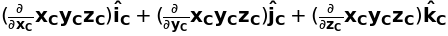

In [147]:
C = CoordSys3D('C')
delop = Del()
gradient_field = delop(C.x*C.y*C.z)
gradient_field

In [148]:
gradient_field.doit()

In [150]:
gradient(C.x*C.y*C.z)

In [151]:
delop.gradient(C.x*C.y*C.z).doit()

#### Curl

##### Method 1

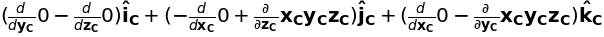

In [132]:
delop = Del()
delop.cross(C.x*C.y*C.z*C.i)

In [136]:
delop.cross(C.x*C.y*C.z*C.i).doit()

##### Method 2

In [138]:
curl(C.x*C.y*C.z*C.i)

#### Divergence

In [152]:
divergence(C.x*C.y*C.z*(C.i + C.j + C.k))

In [154]:
delop.dot(C.x*C.y*C.z*(C.i + C.j + C.k)).doit()

#### Directional Derivative

In [156]:
from sympy.vector import directional_derivative
directional_derivative(C.x*C.y*C.z, 3*C.i + 4*C.j + C.k)

#### Conservative Field
* Curl = 0 
* Irrotational 
* Conservation of Energy
* Gradient of some scalar field

In [159]:
R = CoordSys3D('R')
field = R.y*R.z*R.i + R.x*R.z*R.j + R.x*R.y*R.k
is_conservative(field)

True

In [160]:
curl(field)

#### Solenoidal Field
* Div = 0

In [164]:
R = CoordSys3D('R')
field = R.y*R.z*R.i + R.x*R.z*R.j + R.x*R.y*R.k
is_solenoidal(field)

True

In [165]:
divergence(field)

#### Scalar Potential Functions

In [169]:
R = CoordSys3D('R')
conservative_field = 4*R.x*R.y*R.z*R.i + 2*R.x**2*R.z*R.j + 2*R.x**2*R.y*R.k
scalar_potential(conservative_field, R)

In [172]:
R = CoordSys3D('R')
P = R.origin.locate_new('P', 1*R.i + 2*R.j + 3*R.k)
vectfield = 4*R.x*R.y*R.i + 2*R.x**2*R.j
scalar_potential_difference(vectfield, R, R.origin, P)